# Import necessary library

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

# Read the table using pd.read_table()

In [78]:
df = pd.read_table('2.fruit_data_with_colors.txt')

# Display first few rows of the fruits

In [79]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


# Display the unique fruits name

In [80]:
df['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

# Examine the shape of the datasets

In [81]:
df.shape

(59, 7)

# Calculate the descriptive statistics for each column 

In [82]:
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


# visulaize the distribution of the data

In [83]:
df.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [84]:
cols = ['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score']

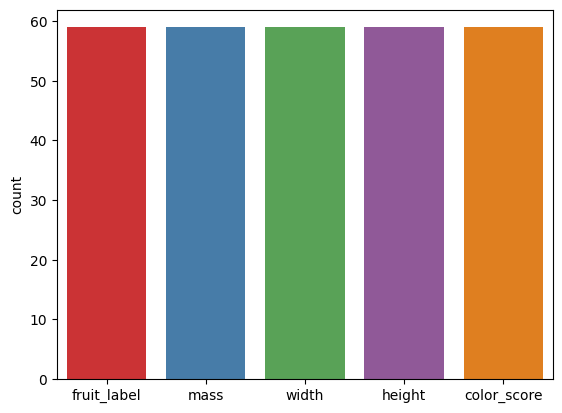

In [85]:
for col in cols:
    sns.countplot(df[cols] , palette="Set1")

# Convert into numeric data


In [86]:
encoder = LabelEncoder()


In [87]:
df['fruit_name'] = encoder.fit_transform(df['fruit_name'])

In [88]:
df['fruit_subtype'] = encoder.fit_transform(df['fruit_subtype'])

# Split the data 

In [89]:
x = df.drop('fruit_name', axis = 1)

In [90]:
y = df['fruit_name']


In [91]:
y

0     0
1     0
2     0
3     2
4     2
5     2
6     2
7     2
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    3
25    3
26    3
27    3
28    3
29    3
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
40    3
41    3
42    3
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
52    1
53    1
54    1
55    1
56    1
57    1
58    1
Name: fruit_name, dtype: int64

In [92]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=0)

# Scale the features using MinMaxScaler().

# Model Training and Evaluation:


In [93]:
model = LogisticRegression()

In [94]:
model.fit(X_train, y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
y_predict = model.predict(X_test)

In [96]:
data = pd.DataFrame({'Actual': y_test,'Predicted': y_predict})

In [97]:
data

,Actual,Predicted
26,3,3
35,3,3
43,1,1
28,3,3
11,0,0
2,0,0


# Evaluating model's Accuracy

In [98]:
accuracy = r2_score(y_test, y_predict)

In [99]:
accuracy

1.0

In [103]:
accuracy_f1 = f1_score(y_test, y_predict, average=None)

In [105]:
accuracy_f1.tolist()

[1.0, 1.0, 1.0]